This is example macros of using the ECCE style defined in ROOT environment but used in plotting python numpy arrays

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

# Environment setup

## 1. `ROOT`

In [3]:
os.environ["ROOT_INCLUDE_PATH"] =  os.getenv("ROOT_INCLUDE_PATH") + ":/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_new/new/rootmacros"

First of all, you will need [`pyROOT`](https://root.cern/manual/python/). You can install ROOT directly or use the [ECCE Singularity Container (on your computer or lab farms)](https://github.com/ECCE-EIC/Singularity)

Any 'ROOT' version should work. Here is example in sPHENIX environment for example.

In [4]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.24/06


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.4`

## 2. ECCE style macros

Next we need the `ECCEStyle` macros. You can either 
* load it from CVMFS with the ECCE software distribution as in input \[3\] above `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_new/new/rootmacros`
* or simply download the files to local folder at [`ECCEStyle.C`](https://raw.githubusercontent.com/ECCE-EIC/macros/master/common/ECCEStyle.C) and [`ECCEStyle.h`](https://raw.githubusercontent.com/ECCE-EIC/macros/master/common/ECCEStyle.h)

The following cell load the style file into `ROOT`

In [5]:
ROOT.gInterpreter.Declare("""
#include <ECCEStyle.C>
    """)

ROOT.gInterpreter.ProcessLine("SetECCEStyle()")

0

ECCEStyle: Applying nominal settings.
ECCEStyle: ROOT6 mode


# Make an example plot

Start by preparing some random `numpy` array in *double precision* `dtype`

In [6]:
import numpy as np

array_x = np.arange(1,11,1, np.dtype('float64'))
array_y1 = np.arange(10,40,3, np.dtype('float64'))
array_y2 = np.arange(40,10,-3, np.dtype('float64'))

Here we make two [`TGraph`s](https://root.cern.ch/doc/master/classTGraph.html). You can also use graph with error bar [`TGraphErrors`](https://root.cern.ch/doc/master/classTGraphErrors.html)
You can set marker/line style according to the above reference manual. 

In [7]:
graph1 = ROOT.TGraph (len(array_x), array_x, array_y1);

graph2 = ROOT.TGraph (len(array_x), array_x, array_y2);


graph1.SetMarkerStyle(ROOT.kFullCircle)

graph2.SetMarkerStyle(ROOT.kOpenCircle)

And this plot it with standard ECCE labeling. Results saved to PDF and PNG

Info in <TCanvas::Print>: pdf file test_style.pdf has been created
Info in <TCanvas::Print>: png file test_style.png has been created


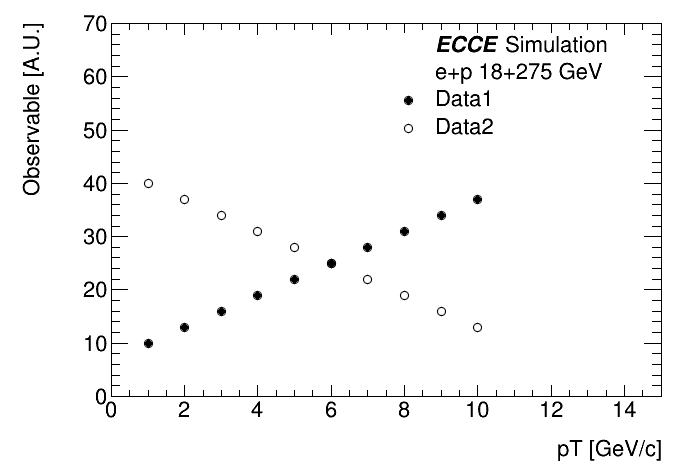

In [8]:
c = ROOT.TCanvas();

c.DrawFrame(0,0,15,70, ";pT [GeV/c];Observable [A.U.]")
graph1.Draw("p")
graph2.Draw("p")


leg = ROOT.TLegend (.55,.70,.85,.93);
leg.AddEntry("","#it{#bf{ECCE}} Simulation","");
leg.AddEntry("","e+p 18+275 GeV","");
leg.AddEntry(graph1,"Data1","p");
leg.AddEntry(graph2,"Data2","p");
leg.Draw();

c.Print("test_style.pdf");
c.Print("test_style.png");
c.Draw();